# Ivarsson et al. (2009): Femur shaft Bending and axial compression

- Performed by: 
- Reviewed by:
- Last modified : 23rd july 2023
- SAFER HBM Version:  
    - ![Static Badge](https://img.shields.io/badge/SAFER_HBM-10.0-1?style=flat&logoColor=blue&labelColor=whitw&color=green)
    - ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
    
- LSDYNA version:  `mpp d R12.2.1 `

## Experiment by  Ivarsson (2009)

### Summary:

The simulated outputs are compared to the references from PMHS tests reported by  Ivarsson  <sup>[1]</sup>
1. IVARSSON, B. Johan, et al. The tolerance of the femoral shaft in combined axial compression and bending loading. Stapp car crash journal, 2009, 53: 251.

![](_env/setup_ivarsson_femur.PNG) 

### Information on the subjects/specimens
| Test ID | Subject ID | Age (yrs) | Sex |    Loading mode   |
|:-------:|:----------:|:---------:|:---:|:-----------------:|
|   1.01  |     373    |     51    |  M  | Combined Loading  |
|   1.02  |     373    |     51    |  M  | Combined Loading  |
|   1.03  |     374    |     62    |  M  | Combined Loading  |
|   1.04  |     374    |     62    |  M  | Combined Loading  |
|   1.05  |     375    |     62    |  M  | Combined Loading  |
|   1.06  |     375    |     62    |  M  | Combined Loading  |
|   1.07  |     376    |     49    |  M  | Combined Loading  |
|   1.08  |     376    |     49    |  M  | Combined Loading  |
|   1.09  |     377    |     62    |  M  | Combined Loading  |
|   1.1   |     378    |     44    |  M  | Combined Loading  |
|   1.11  |     378    |     44    |  M  | Combined Loading  |
|   1.12  |     379    |     58    |  M  | Combined Loading  |
|   1.13  |     379    |     58    |  M  | Combined Loading  |
|   1.14  |     380    |     65    |  M  | Combined Loading  |
|   1.15  |     380    |     65    |  M  | Combined Loading  |
|   1.16  |     381    |     53    |  M  | Combined Loading  |
|   1.17  |     381    |     53    |  M  | Combined Loading  |
|   1.30  |     385    |     62    |  M  | Combined Loading  |
|   1.34  |     390    |     63    |  M  | Bending           |
|   1.37  |     392    |     45    |  M  | Bending           |
|   1.38  |     392    |     45    |  M  | Bending           |
|   2.06  |     327    |     39    |  M  | Bending           |
|  2.07b  |     362    |     51    |  M  | Bending           |

### Loading and Boundary Conditions
- 23 male specimens tested for axial compression, bending and combined loading.
- The potting cups are made of PMMA were defined with youngs modulus 3.1 GPa, poissons ratio 0.3 and density $1180 kg/m^3$
- The linear bearings were defined as rigid parts youngs modulus 70 GPa, poissons ratio 0.34 and density $2700 kg/m^3$
- A foam material for bending and combined load cases was defined using MAT57 (`*MAT_LOW_DENSITY_FOAM`) material with a nominal stress versus strain curve extracted from the litrture and density 15.6 $kg/m^3$. Two layers of 1 mm belytschko-tsay shell elements were generated as `MAT_NULL_SHELLS` to prevent penetrations.
- The ends of the femur shaft was aligned with the line connecting the centre of rotation of the potting cups. 
- Each potting cup-holder, with linear bearings, were modelled as a revolute joint.
- The right cup, cup-holder and linear bearing was allowed to translate in X-direction, other degrees of freedom were
- restricted. Each of the 23 tests were modelled with associated prescribed displacement from the litrature
### Responses recorded
- force-time  measured at the contact.
- displacement time of the impactor.

The reference values from the paper were digitalised and are incuded in the notebook


In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
import numpy as np

In [2]:

sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
experiment = {"linestyle" :'--', "color" : 'k',"alpha" : 0.7}
simulationv10 = {"linestyle" :'-', "color" : 'g',"alpha" : 1,"linewidth":2}
simulationv11 = {"linestyle" :'-', "color" : 'b',"alpha" : 1,"linewidth":2}
fail10 = {"linestyle" :'--', "color" : 'g',"alpha" : 0.7,"linewidth":1}
fail11 = {"linestyle" :'--', "color" : 'b',"alpha" : 0.7,"linewidth":1}
# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [3]:
# read experiment data
Exp=pd.read_csv(r'data/experiment_data/Ivarsson_et_al_2009_impactor_force.csv',delimiter=';',header=[0])
exp_axl=pd.read_csv(r'data/experiment_data/Ivarsson_et_al_2009_axial_force.csv',delimiter=';',header=[0])


In [4]:
df_v10={}
df_v11={}
Tests=['1_01', '1_02', '1_03', '1_04', '1_05',
       '1_06', '1_07', '1_08', '1_09', '1_10',
       '1_11', '1_12', '1_13', '1_14', '1_15',
       '1_16', '1_17', '1_30', '1_34', '1_37',
       '1_38', '2_06', '2_07b']
age=[51,51,62,62,62,62,49,49,62,44,44,58,58,65,65,53,53,62,63,45,45,39,51]
for test in Tests:
    df_v10[test]=pd.read_csv(r'data\processed\SAFER10.0\{}\Dynasaur_output.csv'.format(test), delimiter=';',na_values='-',  header = [0,1,2,3])
    df_v11[test]=pd.read_csv(r'data\processed\SAFER11.0\{}\Dynasaur_output.csv'.format(test), delimiter=';',na_values='-',  header = [0,1,2,3])

## Combined loading

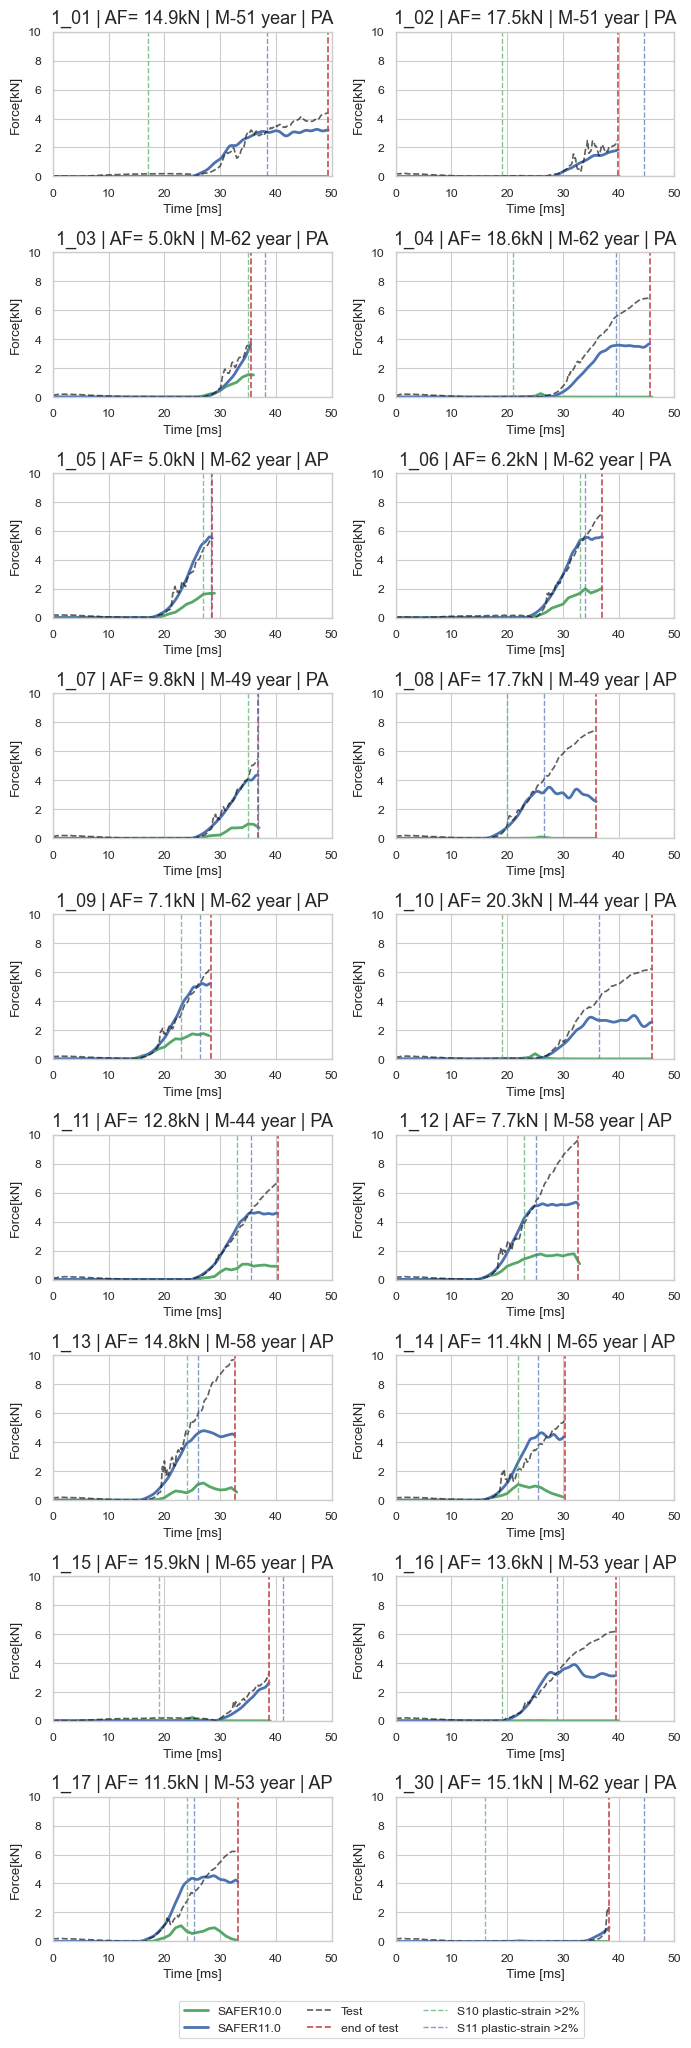

In [52]:
fig_ft, axs = plt.subplots(nrows=9, ncols=2,figsize=(7, 20))
i=0
start_time=[26,28,27,28,18,24,25,17,15,26,25,16,17,17,30,20,16,34,17,17,24,17,22]
Age=['51' , '51', '62', '62', '62','62', '49', '49', '62', '44','44', '58' , '58', '65', '65','53', '53', '62', '63', '45','45', '39', '51']
sp_pos=['PA' , 'PA', 'PA', 'PA', 'AP','PA', 'PA', 'AP', 'AP', 'PA','PA', 'AP' , 'AP', 'AP', 'PA','AP', 'AP', 'PA', 'AP', 'AP','PA', 'AP', 'PA']
for ax in axs.flat:
    ax.set_ylabel('Force[kN]')
    ax.set_xlabel('Time [ms]');
    if i > 17:
        break;
    t=Exp.Time[Exp[Tests[i]]==max(Exp[Tests[i]])].item()
    fail_2p_10=df_v10[Tests[i]].BONES.strain.time.iloc[df_v10[Tests[i]].BONES.strain.strain[df_v10[Tests[i]].BONES.strain.strain<0.0275].last_valid_index()][0]    
    fail_2p_11=df_v11[Tests[i]].BONES.strain.time.iloc[df_v11[Tests[i]].BONES.strain.strain[df_v11[Tests[i]].BONES.strain.strain<0.0275].last_valid_index()][0]
    ax.set_title('{} | AF= {:.1f}kN | M-{} year | {}'.format(Tests[i],max((exp_axl[Tests[i]])),Age[i],sp_pos[i]),fontsize=13)
    ax.set_xlim([0,50])
    ax.set_ylim([0,10])
    ax.plot(df_v10[Tests[i]].impactor.Force.time.iloc[:round(t)+1],df_v10[Tests[i]].impactor.Force.force.iloc[:round(t)+1],**simulationv10)
    ax.plot(df_v11[Tests[i]].impactor.Force.time.iloc[:round(t*10)+1],df_v11[Tests[i]].impactor.Force.force.iloc[:round(t*10)+1],**simulationv11)
    ax.plot(Exp.Time,Exp[Tests[i]],label='Test',**experiment)
    i=i+1
    ax.axvline (x=t,linestyle='--',color='r')
    ax.axvline (x=fail_2p_10,**fail10)
    ax.axvline (x=fail_2p_11,**fail11)
    # ax.scatter(start_time[i-1],0,color='red',marker='o',s=150,alpha=0.5)
# fig_ft.delaxes(axs[4,2])
# fig_ft.delaxes(axs[4,3])
fig_ft.legend(["SAFER10.0","SAFER11.0","Test",'end of test',"S10 plastic-strain >2%","S11 plastic-strain >2%"], bbox_to_anchor=(0.85,0),ncols=3);
fig_ft.tight_layout()


### ISO18571 objective rating for force-time histories

In [6]:
# Import objective rating metric library
from objective_rating_metrics.rating import ISO18571
## Resample data
def resam(xdata,ydata,sT,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = np.arange(sT,endtime,0.1)#10kHz resolution
    newy = np.interp(newx, x, y)
    return np.array(newx).flatten(),np.array(newy).flatten()

In [16]:
versions=['10','11']
version_ISO={}
for version in versions:
    if version=='10':
        df_sim=df_v10
    elif version=='11':
        df_sim=df_v11
    df_res = pd.DataFrame(columns=['SAFER version','Test','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
    i=0
    for test in Tests:
        if test=='1_34':
            break;
        if version=='10':
            endT=df_v10[test].BONES.strain.time.iloc[df_v10[test].BONES.strain.strain[df_v10[test].BONES.strain.strain<0.0275].last_valid_index()][0]
        elif version=='11':
            endT=df_v11[test].BONES.strain.time.iloc[df_v11[test].BONES.strain.strain[df_v11[test].BONES.strain.strain<0.0275].last_valid_index()][0]
        if endT>Exp.Time[Exp[Tests[i]]==max(Exp[Tests[i]])].item():
            endT=Exp.Time[Exp[Tests[i]]==max(Exp[Tests[i]])].item()
            # print(np.round(endT-start_time[i],2))
        df_rate = pd.DataFrame(columns=['SAFER version','Test','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
        if endT>start_time[i]:
            exp_v=Exp[test].dropna()
            exp_t=Exp.Time[:len(exp_v)].dropna()
            sim_t=np.array(df_sim[test].impactor.Force.time).flatten()
            sim_v=np.array(df_sim[test].impactor.Force.force).flatten()
            r_t,r_v=resam(exp_t,exp_v,start_time[i],endT)
            ref = np.vstack((r_t, r_v)).T
            s_t,s_v=resam(sim_t,sim_v,start_time[i],endT)
            sim = np.vstack((s_t, s_v)).T
            iso_rating = ISO18571(reference_curve=ref, comparison_curve=sim)
            df_rate['SAFER version']=[version]
            df_rate['Test']=[test]
            df_rate['Corridor Score']=[iso_rating.corridor_rating()]
            df_rate['Phase Score']=[iso_rating.phase_rating()]
            df_rate['Magnitude Score']=[iso_rating.magnitude_rating()]
            df_rate['Slope Score']=[iso_rating.slope_rating()]
            df_rate['Overall Score']=[iso_rating.overall_rating()]
        else:
            df_rate['SAFER version']=[version]
            df_rate['Test']=[test]
            df_rate['Corridor Score']=0
            df_rate['Phase Score']=0
            df_rate['Magnitude Score']=0
            df_rate['Slope Score']=0
            df_rate['Overall Score']=0
        df_res=pd.concat([df_res,df_rate], ignore_index=True)
        
        i=i+1
    # display(df_res.style.apply(select_col, axis=None).format(precision=2).set_caption("ISO 18571 results").set_table_styles(heading).set_properties(**content))
    # print('version: {} \nAverage: {} \nRange: {}-{}'.format(version,df_res['Overall Score'].mean().round(2),
    #                                        min(df_res['Overall Score']),
    #                                        max(df_res['Overall Score'])))
    version_ISO[version]=df_res
    
# S10={'width' : 0.45 ,'color':'r','alpha':1, 'edgecolor':'r', 'edgecolor':'k'}
# S11={'width' : 0.45 ,'color':'b','alpha':1, 'edgecolor':'b', 'edgecolor':'k'}

# fig, ax = plt.subplots(figsize=(8, 4))
# br1 = np.arange(len(version_ISO['11']))
# ax.bar(br1,version_ISO['10']['Overall Score'].values,**S10,label='SAFER 10.0')
# ax.bar(br1+0.45,version_ISO['11']['Overall Score'].values,**S11,label='SAFER 11')
# plt.xticks(range(len(version_ISO['11'])), version_ISO['11']['Test'], rotation=45)
# ax.set_ylim([0,1])
# ax.set_title('ISO18571',fontsize=20,fontweight='bold')
# ax.set_yticks([0.5,0.58,0.80,0.94,1])
# ax.grid(axis='x')
# ax.legend(loc='best');

In [23]:
df_v10_ISO=pd.read_csv(os.path.join('data\processed\SAFER10.0',"ISO.csv"), delimiter=',', na_values='-', header = [0])
df_v11_ISO=pd.read_csv(os.path.join('data\processed\SAFER11.0',"ISO.csv"), delimiter=',', na_values='-', header = [0])

SHBM V10.0 
 Average: 	 0.25 
 Range: 	 0.0-0.55
--------------------------------------------------------------
SHBM V11.0 
 Average: 	 0.77 
 Range: 	 0.48-0.95


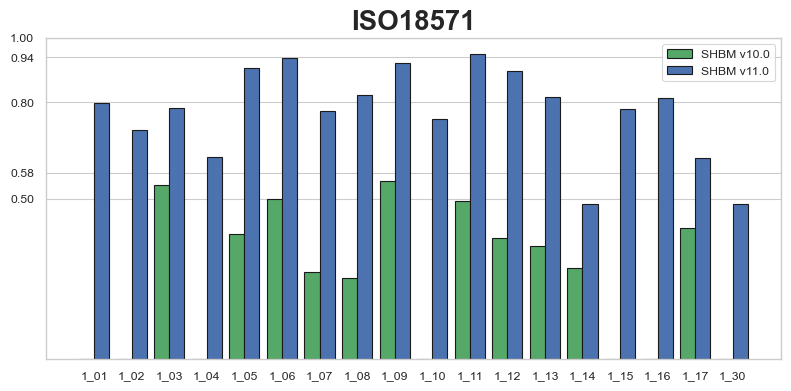

In [24]:
B10={'width' : 0.4 , 'color':'g','alpha':1, 'edgecolor':'k'}
B11={'width' : 0.4 , 'color':'b','alpha':1, 'edgecolor':'k'}

fig, ax = plt.subplots(figsize=(8, 4))
br1 = np.arange(len(df_v11_ISO))
ax.bar(br1-0.2,df_v10_ISO['Overall Score'].values,**B10,label='SHBM v10.0')
ax.bar(br1+0.2,df_v11_ISO['Overall Score'].values,**B11,label='SHBM v11.0')

plt.xticks(range(len(df_v11_ISO)), df_v11_ISO['Test'], rotation=0)
ax.set_ylim([0,1])
ax.set_yticks([0.5,0.58,0.80,0.94,1])
ax.grid(axis='x')
ax.set_title('ISO18571',fontsize=20,fontweight='bold')
ax.legend()
fig.tight_layout()
print('{}SHBM V10.0{} \n Average: \t {} \n Range: \t {}-{}'.format('\033[1m', '\033[0m',df_v10_ISO['Overall Score'].mean().round(2),
                                           min(df_v10_ISO['Overall Score'].round(2)),
                                           max(df_v10_ISO['Overall Score'].round(2))))
print('--------------------------------------------------------------')
print('{}SHBM V11.0{} \n Average: \t {} \n Range: \t {}-{}'.format('\033[1m', '\033[0m',df_v11_ISO['Overall Score'].mean().round(2),
                                           min(df_v11_ISO['Overall Score'].round(2)),
                                           max(df_v11_ISO['Overall Score'].round(2))))


## Bending Load

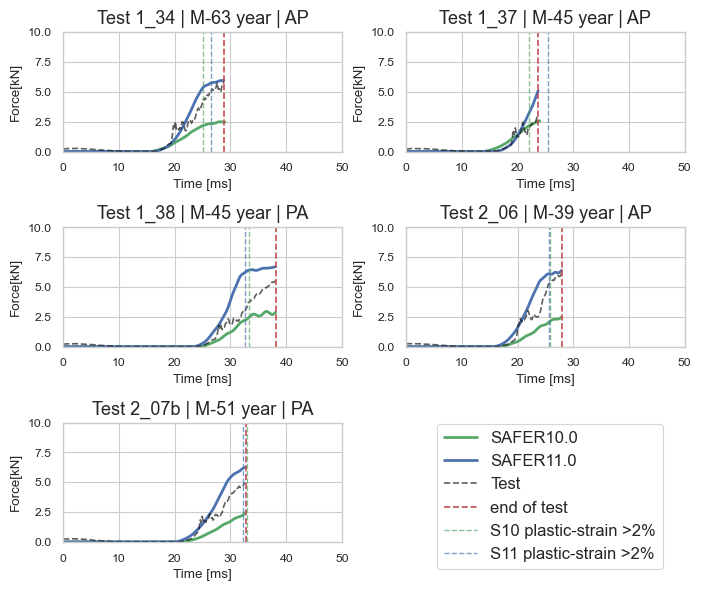

In [32]:
fig_ft, axs = plt.subplots(nrows=3, ncols=2,figsize=(7, 6))
i=18
start_time=[26,28,27,28,18,24,25,17,15,26,25,16,17,17,30,20,16,34,15,15.5,23,15,20]
for ax in axs.flat:
    ax.set_ylabel('Force[kN]')
    ax.set_xlabel('Time [ms]');
    if i > 22:
        break;
    t=Exp.Time[Exp[Tests[i]]==max(Exp[Tests[i]])].item()
    t1=Exp.Time[Exp[Tests[i]]==max(Exp[Tests[i]])].item()
    if i>19:
        t1=t*10
    
    fail_2p_10=df_v10[Tests[i]].BONES.strain.time.iloc[df_v10[Tests[i]].BONES.strain.strain[df_v10[Tests[i]].BONES.strain.strain<0.0275].last_valid_index()][0]    
    fail_2p_11=df_v11[Tests[i]].BONES.strain.time.iloc[df_v11[Tests[i]].BONES.strain.strain[df_v11[Tests[i]].BONES.strain.strain<0.0275].last_valid_index()][0]
    ax.set_title('Test {} | M-{} year | {}'.format(Tests[i],Age[i],sp_pos[i]),fontsize=13)
    ax.set_xlim([0,50])
    ax.set_ylim([0,10])
    ax.plot(df_v10[Tests[i]].impactor.Force.time.iloc[:round(t1)+1],df_v10[Tests[i]].impactor.Force.force.iloc[:round(t1)+1],**simulationv10)
    ax.plot(df_v11[Tests[i]].impactor.Force.time.iloc[:round(t*10)+1],df_v11[Tests[i]].impactor.Force.force.iloc[:round(t*10)+1],**simulationv11)
    ax.plot(Exp.Time,Exp[Tests[i]],label='Test',**experiment)
    ax.axvline (x=t,linestyle='--',color='r')
    ax.axvline (x=fail_2p_10,**fail10)
    ax.axvline (x=fail_2p_11,**fail11)
    # ax.scatter(start_time[i],0,color='red',marker='o',s=150,alpha=0.5)
    i=i+1
fig_ft.delaxes(axs[2,1])
fig_ft.legend(["SAFER10.0","SAFER11.0","Test",'end of test',"S10 plastic-strain >2%","S11 plastic-strain >2%"],
              bbox_to_anchor=(0.95,0.30),fontsize=12);
fig_ft.tight_layout()

### ISO18571 objective rating for force-time histories

In [33]:
versions=['10','11']
version_ISO={}
# test_b=['2_07b']
test_b=[ '1_34', '1_37','1_38', '2_06', '2_07b']
for version in versions:
    if version=='10':
        df_sim=df_v10
    elif version=='11':
        df_sim=df_v11
    df_res = pd.DataFrame(columns=['SAFER version','Test','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
    i=18
    for test in test_b:
        endT=df_sim[test].BONES.strain.time.iloc[df_sim[test].BONES.strain.strain[df_sim[test].BONES.strain.strain<0.0275].last_valid_index()][0]
        if endT>Exp.Time[Exp[test]==max(Exp[test])].item():
            endT=Exp.Time[Exp[test]==max(Exp[test])].item()
        # print(start_time[i])
        # print(endT-start_time[i])
        exp_v=Exp[test].dropna()
        exp_t=Exp.Time[:len(exp_v)].dropna()
        sim_t=np.array(df_sim[test].impactor.Force.time).flatten()
        sim_v=np.array(df_sim[test].impactor.Force.force).flatten()
        r_t,r_v=resam(exp_t,exp_v,start_time[i],endT)
        ref = np.vstack((r_t, r_v)).T
        s_t,s_v=resam(sim_t,sim_v,start_time[i],endT)
        sim = np.vstack((s_t, s_v)).T
        # # plt.figure()
        # plt.plot(r_t,r_v,color='k')
        # plt.plot(s_t,s_v,label=version,color='C{}'.format(version))
        # plt.axvline(start_time[i],color='g')
        # plt.axvline(endT,color='C{}'.format(version),label='stop-{}'.format(version))
        # plt.legend()
        iso_rating = ISO18571(reference_curve=ref, comparison_curve=sim)
        df_rate = pd.DataFrame(columns=['SAFER version','Test','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
        df_rate['SAFER version']=[version]
        df_rate['Test']=[test]
        df_rate['Corridor Score']=[iso_rating.corridor_rating()]
        df_rate['Phase Score']=[iso_rating.phase_rating()]
        df_rate['Magnitude Score']=[iso_rating.magnitude_rating()]
        df_rate['Slope Score']=[iso_rating.slope_rating()]
        df_rate['Overall Score']=[iso_rating.overall_rating()]
        df_res=pd.concat([df_res,df_rate], ignore_index=True)
        i=i+1
    # display(df_res.style.apply(select_col, axis=None).format(precision=2).set_caption("ISO 18571 results").set_table_styles(heading).set_properties(**content))
    # print('version: {} \nAverage: {} \nRange: {}-{}'.format(version,df_res['Overall Score'].mean().round(2),
    #                                        min(df_res['Overall Score']),
    #                                        max(df_res['Overall Score'])))
    version_ISO[version]=df_res
# fig, ax = plt.subplots(figsize=(4, 4))
# br1 = np.arange(len(version_ISO['11']))
# ax.bar(br1,version_ISO['10']['Overall Score'].values,**S10,label='SAFER 10.0')
# ax.bar(br1+0.45,version_ISO['11']['Overall Score'].values,**S11,label='SAFER 11')
# plt.xticks(range(len(version_ISO['11'])), version_ISO['11']['Test'], rotation=0)
# ax.set_ylim([0,1])
# ax.set_yticks([0.5,0.58,0.80,0.94,1])
# ax.set_title('ISO18571',fontsize=20,fontweight='bold')
# ax.grid(axis='x')
# ax.legend(loc='best');

In [43]:
df_v10_ISO=pd.read_csv(os.path.join('data\processed\SAFER10.0',"ISO_bending.csv"), delimiter=',', na_values='-', header = [0])
df_v11_ISO=pd.read_csv(os.path.join('data\processed\SAFER11.0',"ISO_bending.csv"), delimiter=',', na_values='-', header = [0])

SHBM V10.0 
 Average: 	 0.58 
 Range: 	 0.54-0.64
--------------------------------------------------------------
SHBM V11.0 
 Average: 	 0.55 
 Range: 	 0.24-0.78


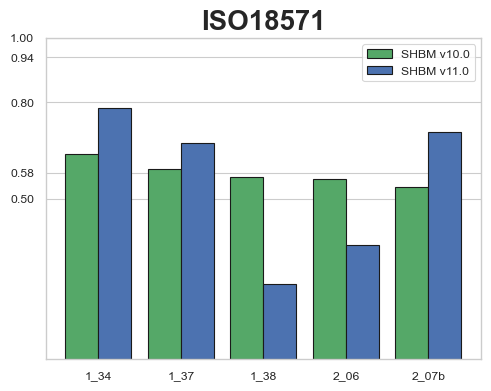

In [45]:
B10={'width' : 0.4 , 'color':'g','alpha':1, 'edgecolor':'k'}
B11={'width' : 0.4 , 'color':'b','alpha':1, 'edgecolor':'k'}

fig, ax = plt.subplots(figsize=(5, 4))
br1 = np.arange(len(df_v11_ISO))
ax.bar(br1-0.2,df_v10_ISO['Overall Score'].values,**B10,label='SHBM v10.0')
ax.bar(br1+0.2,df_v11_ISO['Overall Score'].values,**B11,label='SHBM v11.0')

plt.xticks(range(len(df_v11_ISO)), df_v11_ISO['Test'], rotation=0)
ax.set_ylim([0,1])
ax.set_yticks([0.5,0.58,0.80,0.94,1])
ax.grid(axis='x')
ax.set_title('ISO18571',fontsize=20,fontweight='bold')
ax.legend()
fig.tight_layout()
print('{}SHBM V10.0{} \n Average: \t {} \n Range: \t {}-{}'.format('\033[1m', '\033[0m',df_v10_ISO['Overall Score'].mean().round(2),
                                           min(df_v10_ISO['Overall Score'].round(2)),
                                           max(df_v10_ISO['Overall Score'].round(2))))
print('--------------------------------------------------------------')
print('{}SHBM V11.0{} \n Average: \t {} \n Range: \t {}-{}'.format('\033[1m', '\033[0m',df_v11_ISO['Overall Score'].mean().round(2),
                                           min(df_v11_ISO['Overall Score'].round(2)),
                                           max(df_v11_ISO['Overall Score'].round(2))))
